In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # to suppress runtime warnings.

In [13]:
raw_data_sheet = pd.read_csv('../data/20170906_003_eye_10min.csv')

In [14]:
def group_consecutive(a,step=1):
    ''' group consecutive numbers in an array
        modified from https://zhuanlan.zhihu.com/p/29558169'''
    return np.split(a, np.where(np.diff(a) > step)[0] + 1)

In [15]:
def eye_data_episode(eye_data_sheet, episode_gap=4):
    ''' 对视频分析的结果进行episode归类
        返回值：list(tuple(start,end),...)'''
    raw_data = np.array([])
    for index in range(eye_data_sheet.shape[0]):
        start = eye_data_sheet.iloc[index]['start']
        end = eye_data_sheet.iloc[index]['end']
        if start>end:
            start, end = end, start
        #print(start,end)
        raw_data = np.hstack((raw_data, np.linspace(start,end,(end-start)*1000)))

    bout_time_array = group_consecutive(raw_data, step=episode_gap)
    bout_time_pair = [(bout_time_array[index][0], bout_time_array[index][-1]) for index in range(len(bout_time_array))]

    return bout_time_pair

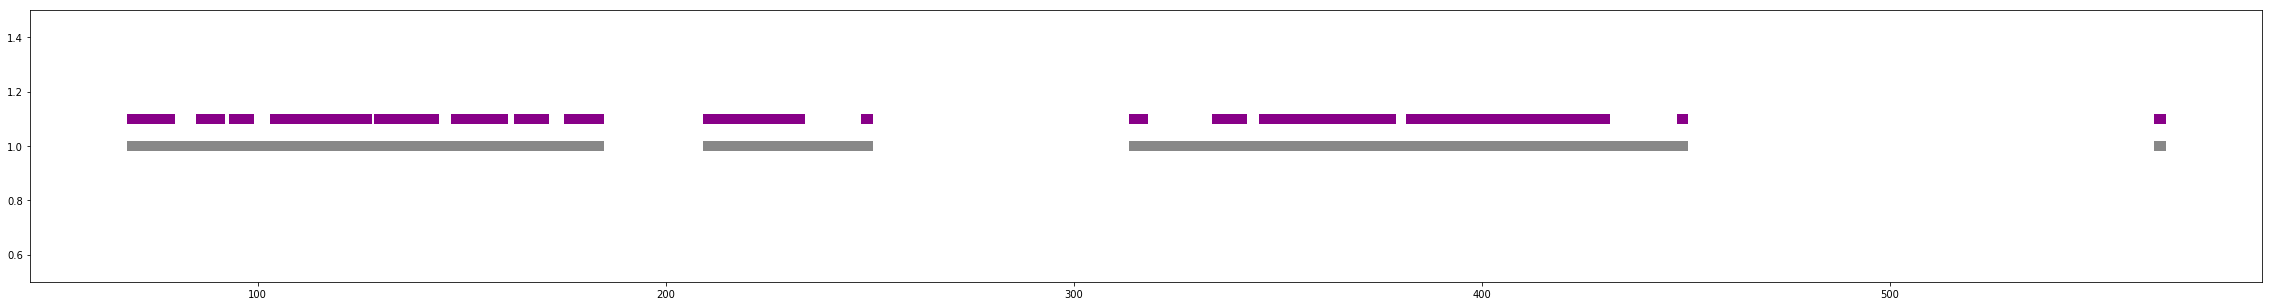

In [19]:
episode_gap = 20
bout_time_pair = eye_data_episode(raw_data_sheet, episode_gap)
#plotting
plt.figure(figsize=(40,5))
#plt.scatter(raw_data,np.ones(raw_data.shape))
for start,end in bout_time_pair:
    plt.plot([start,end],[1,1],c='#888888',linewidth=10, label='episode')
for start,end in raw_pair:
    plt.plot([start,end],[1.1,1.1],c='#880088',linewidth=10,label='raw')
plt.ylim(0.5,1.5)
plt.show()
plt.close()